<a href="https://colab.research.google.com/github/rs-delve/covid19_datasets/blob/master/usage_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID Datasets

This notebook provides usage examples for Covid data set loaders in the [DELVE COVID-19 Datasets Github repository](https://github.com/rs-delve/covid19_datasets). These loaders make up the sources of the [Combined International dataset](https://github.com/rs-delve/covid19_datasets/tree/master/dataset) and may contain more details or finer resolution than what's included in the combined dataset.

First step is to install the code.

In [1]:
%pip install git+https://github.com/DELVE-covid19/covid19_datasets.git

  Cloning https://github.com/DELVE-covid19/covid19_datasets.git to /tmp/pip-req-build-2cz09yfy
  Running command git clone -q https://github.com/DELVE-covid19/covid19_datasets.git /tmp/pip-req-build-2cz09yfy
     |████████████████████████████████| 10.0MB 2.4MB/s 
  Created wheel for covid19-datasets: filename=covid19_datasets-0.1-cp36-none-any.whl size=28387 sha256=3a4c93b0ec4f616c7176d8799347ab449df3d617f274c552d33968f4bfb93960
  Stored in directory: /tmp/pip-ephem-wheel-cache-9d84je1t/wheels/62/9f/36/fce8871d7ba037b8c0f5b959fa5f838b6b240ce59c7c1eca78
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=a39f55cffd08c4ea42bcbe72d90addedc4d74665d9dd3fdaf56e07ac4b062869
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built covid19-datasets pycountry


Now some library files for visualising the data. 

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
import pandas as pd

Just for info, we include some log messages in this usage notebook to show how the data sets are loading.

In [0]:
# optional - see log messages about datasets loading

import logging
import sys
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

### Oxford Government Policy Tracker

The Oxford Government policy tracker available [here](https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker) allows different government responses to Covid19 be loaded in. It can be loaded from the `covid19_datasets` as follows.

In [0]:
from covid19_datasets import OxfordGovernmentPolicyDataset

You can create an instance of the data set by constructing a data set object.

In [5]:
ogp = OxfordGovernmentPolicyDataset()

INFO:covid19_datasets.oxford_government_policy:Loading dataset from https://oxcgrtportal.azurewebsites.net/api/CSVDownload
INFO:covid19_datasets.oxford_government_policy:Loaded


As an example, we'll look at policy information from South Africa. 

In [0]:
country = 'South Africa'

We'll use `matplotlib` to plot when different policies occured and compare it with epidemic dynamics

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


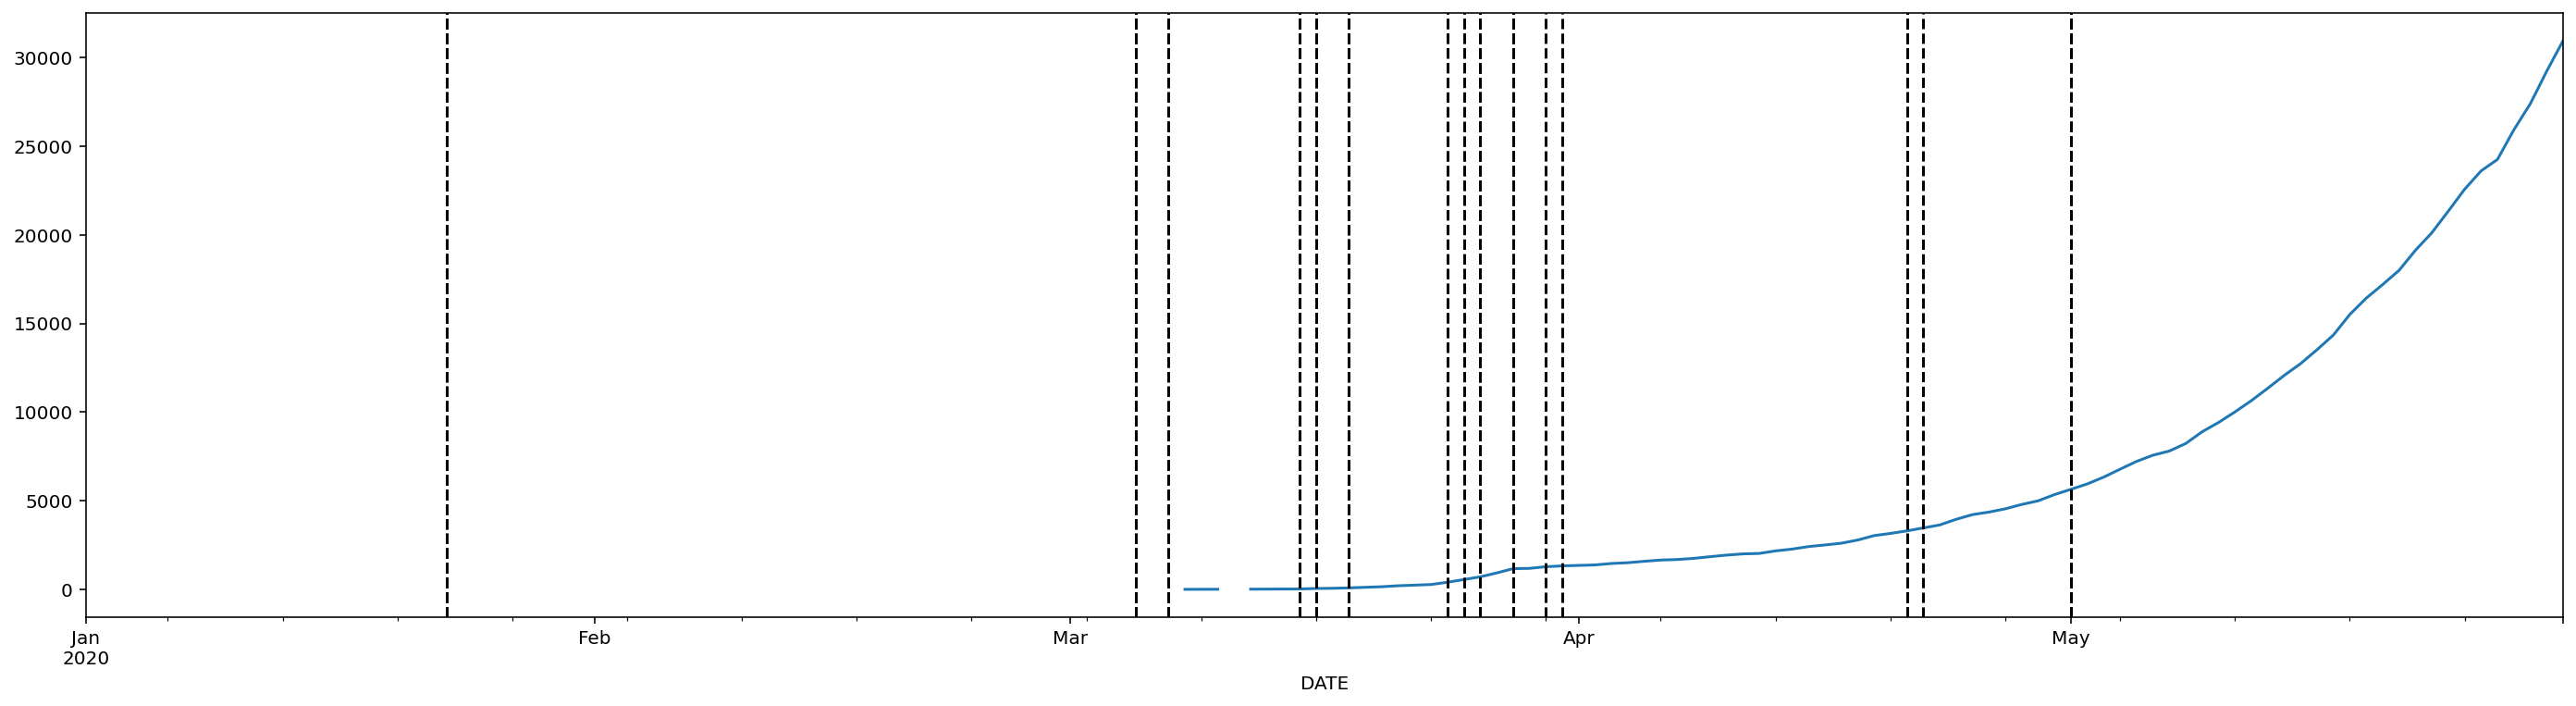

In [7]:
fig, ax = plt.subplots(figsize=(24, 6))
ogp.get_country_data(country).set_index('DATE').ConfirmedCases.plot(ax=ax)

policy_changes = ogp.get_country_policy_changes(country)

for c in policy_changes.columns:
    policy = policy_changes.loc[:, c]
    policy = policy[policy]
    if policy.any():
        for d in policy.index:
            ax.axvline(d, color='k', ls='--')

We can also cycle through the policy changes to print when different changes were made.

In [8]:
for c in policy_changes.columns:
    policy = policy_changes.loc[:, c]
    policy = policy[policy]
    if policy.any():
        for d in policy.index:
            print(f'Policy {c} changed on {d}')

Policy npi_school_closing changed on 2020-03-18 00:00:00
Policy npi_workplace_closing changed on 2020-03-26 00:00:00
Policy npi_workplace_closing changed on 2020-05-01 00:00:00
Policy npi_cancel_public_events changed on 2020-03-16 00:00:00
Policy npi_gatherings_restrictions changed on 2020-03-16 00:00:00
Policy npi_close_public_transport changed on 2020-03-26 00:00:00
Policy npi_stay_at_home changed on 2020-03-26 00:00:00
Policy npi_internal_movement_restrictions changed on 2020-03-15 00:00:00
Policy npi_internal_movement_restrictions changed on 2020-03-26 00:00:00
Policy npi_international_travel_controls changed on 2020-01-23 00:00:00
Policy npi_international_travel_controls changed on 2020-03-18 00:00:00
Policy npi_international_travel_controls changed on 2020-03-26 00:00:00
Policy npi_income_support changed on 2020-04-21 00:00:00
Policy npi_fiscal_measures changed on 2020-03-24 00:00:00
Policy npi_fiscal_measures changed on 2020-03-25 00:00:00
Policy npi_fiscal_measures changed on 2

### World Bank Data

The world bank provides global development data for individual countries and bigger regions,. Available is data on population, economy, education, etc. More info at https://data.worldbank.org/.

In [9]:
from covid19_datasets import WorldBankDataBank, AGGREGATES
wbdb = WorldBankDataBank()

INFO:covid19_datasets.world_bank:Loading dataset


Here we urban population for the top 20 urban-populated countries in the world, using matplotlib. Notice how AGGREGATES that represent world's regions must be dropped from the dataset, to leave only individual countries data.

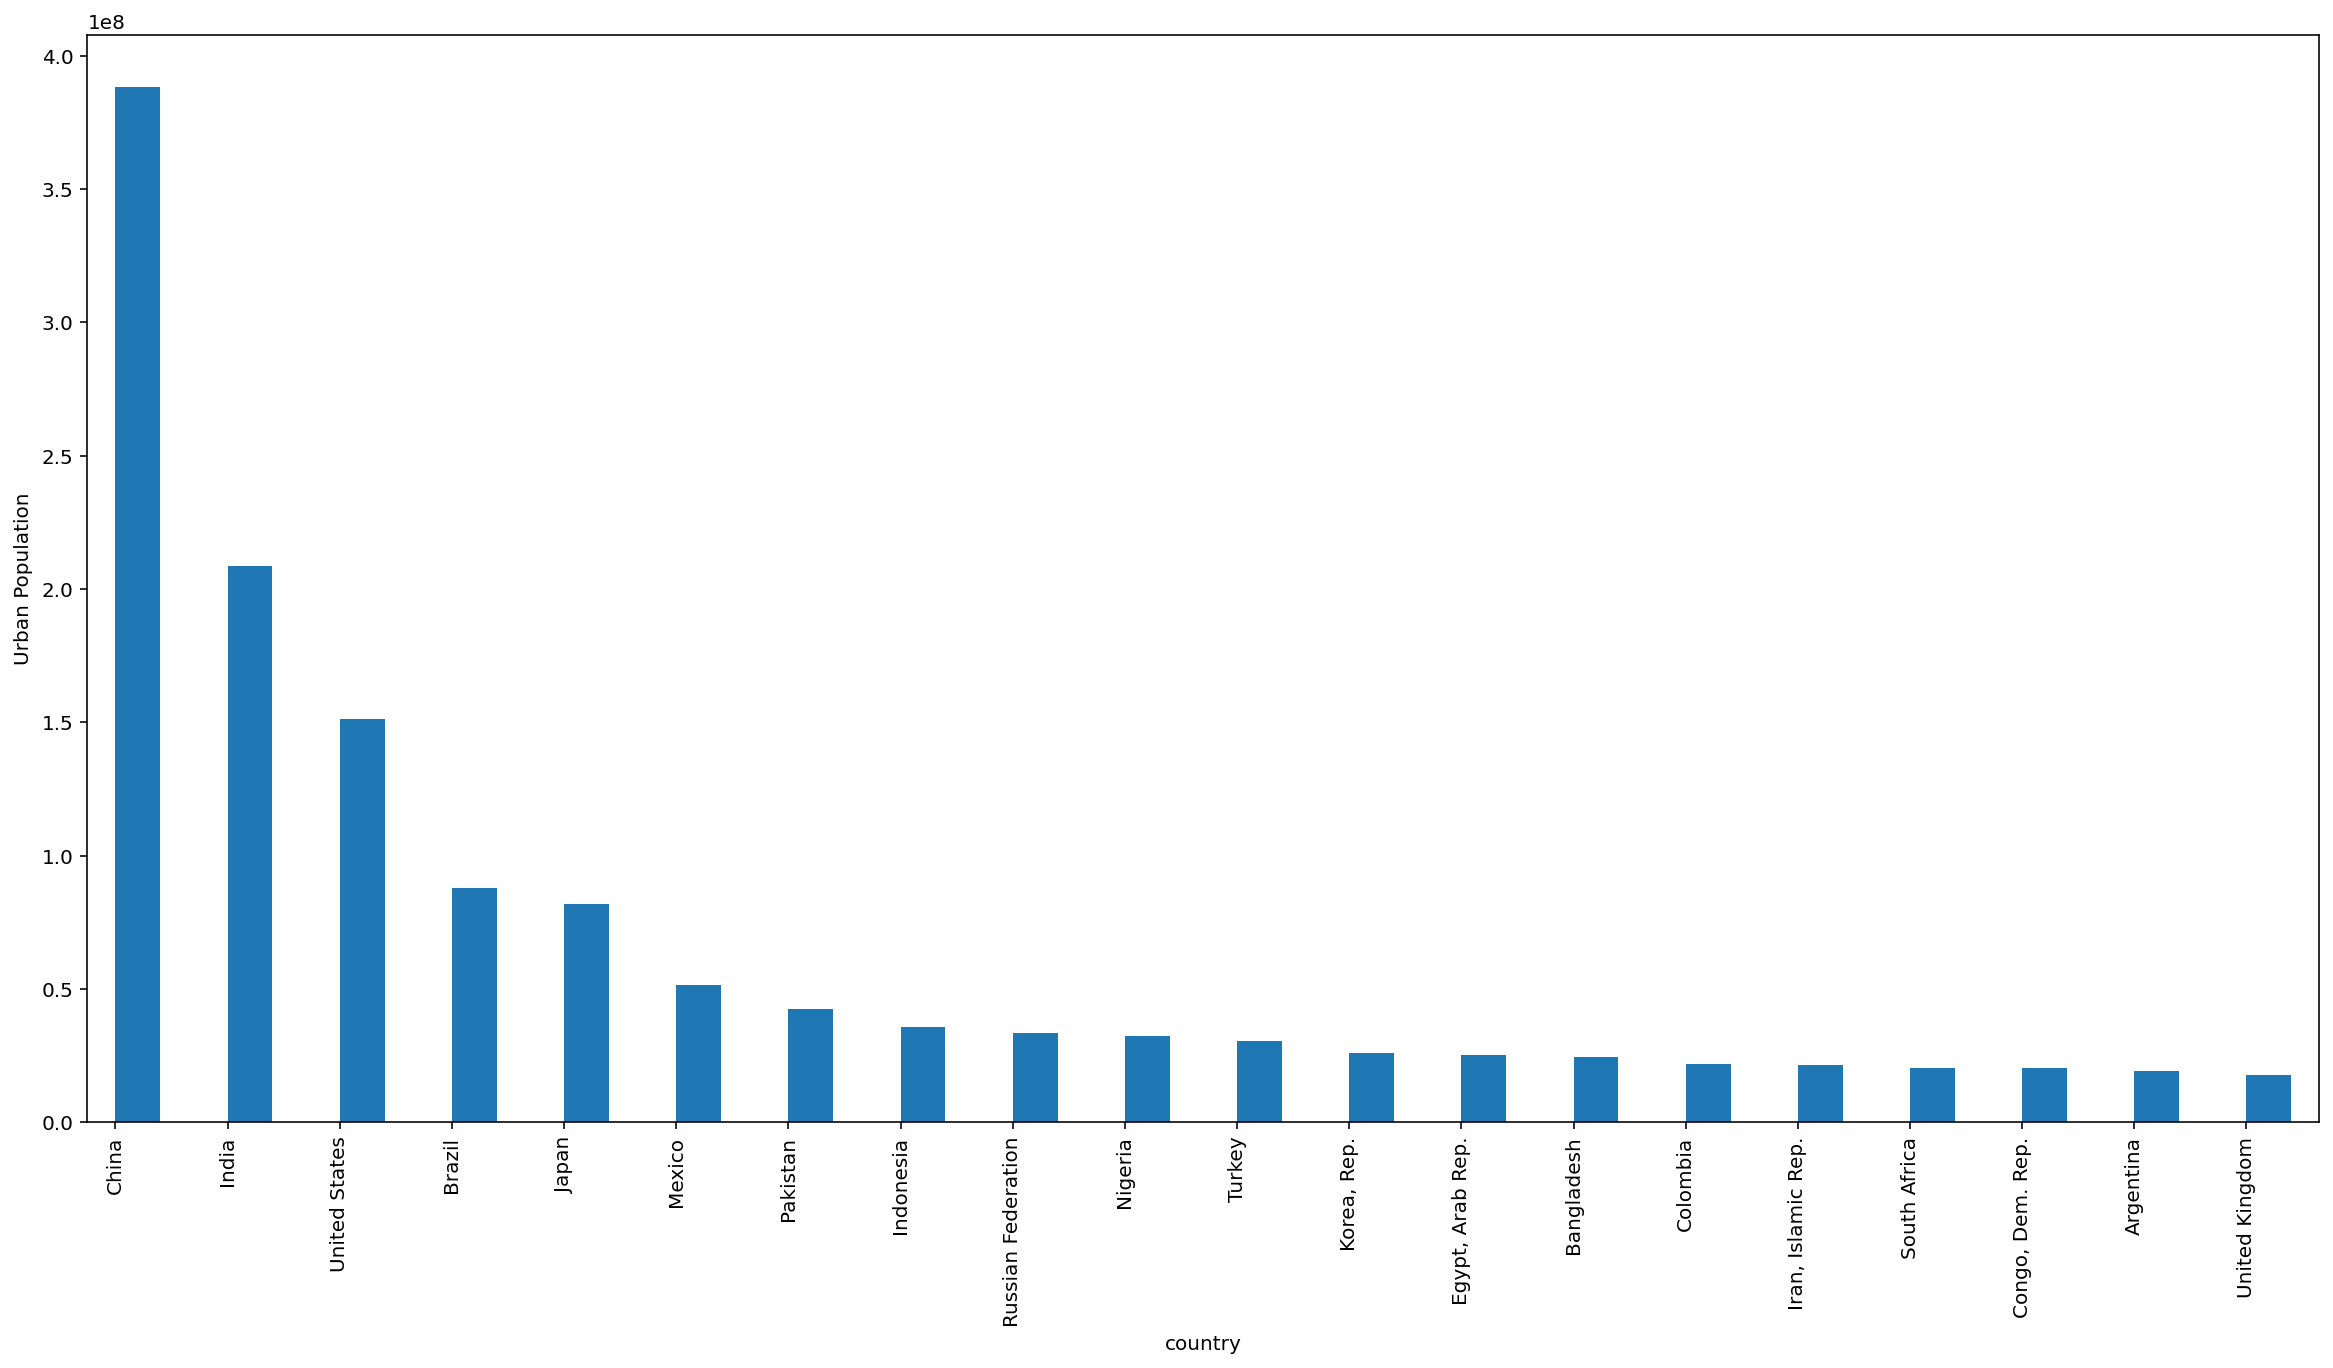

In [15]:
df = wbdb.get_data()
df = df.set_index('country').drop(AGGREGATES).nlargest(20, "stats_population_urban")

_, ax = plt.subplots(figsize=(20, 10))

df["stats_population_urban"].plot(kind='bar', ax=ax, position=0, width=0.4)

ax.set_ylabel('Urban Population')

plt.show()

### YouGov Behavioural Tracker

YouGov's behavioural tracker conducts surveys in more than 30 countries to understand how COVID-19 and governmental response to it affects human behavior. More info can be found here: https://yougov.co.uk/topics/international/articles-reports/2020/03/17/YouGov-international-COVID-19-tracker. The raw data can be seen in YouGov COVID-19 tracker [github page](https://github.com/YouGov-Data/covid-19-tracker/tree/master/data).

In [0]:
from covid19_datasets import YouGovBehaviouralTracker

In [17]:
ygbt = YouGovBehaviouralTracker()

INFO:covid19_datasets.yougov_behavioural_tracker:Loading dataset
INFO:covid19_datasets.yougov_behavioural_tracker:Loading australia from https://raw.githubusercontent.com/YouGov-Data/covid-19-tracker/master/data/australia.csv
INFO:covid19_datasets.yougov_behavioural_tracker:Loading brazil from https://raw.githubusercontent.com/YouGov-Data/covid-19-tracker/master/data/brazil.csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO:covid19_datasets.yougov_behavioural_tracker:Loading canada from https://raw.githubusercontent.com/YouGov-Data/covid-19-tracker/master/data/canada.csv
INFO:covid19_datasets.yougov_behavioural_tracker:Loading china from https://raw.githubusercontent.com/YouGov-Data/covid-19-tracker/master/data/china.csv
INFO:covid19_datasets.yougov_behavioural_tracker:Loading denmark from https://raw.githubusercontent.com/YouGov-Data/covid-19-tracker/master/data/denmark.csv
INFO:covid19_datasets.yougov_behavioural_tracker:Loading finland from https://raw.githubusercontent.com/YouGov-Data/covid-19-tracker/master/data/finland.csv
INFO:covid19_datasets.yougov_behavioural_tracker:Loading france from https://raw.githubusercontent.com/YouGov-Data/covid-19-tracker/master/data/france.csv
INFO:covid19_datasets.yougov_behavioural_tracker:Loading germany from https://raw.githubusercontent.com/YouGov-Data/covid-19-tracker/master/data/germany.csv
INFO:covid19_datasets.yougov_behavioural_tracker:Loading hong kong

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (89) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO:covid19_datasets.yougov_behavioural_tracker:Loading italy from https://raw.githubusercontent.com/YouGov-Data/covid-19-tracker/master/data/italy.csv
INFO:covid19_datasets.yougov_behavioural_tracker:Loading japan from https://raw.githubusercontent.com/YouGov-Data/covid-19-tracker/master/data/japan.csv
INFO:covid19_datasets.yougov_behavioural_tracker:Loading malaysia from https://raw.githubusercontent.com/YouGov-Data/covid-19-tracker/master/data/malaysia.csv
INFO:covid19_datasets.yougov_behavioural_tracker:Loading mexico from https://raw.githubusercontent.com/YouGov-Data/covid-19-tracker/master/data/mexico.csv
INFO:covid19_datasets.yougov_behavioural_tracker:Loading netherlands from https://raw.githubusercontent.com/YouGov-Data/covid-19-tracker/master/data/netherlands.csv
INFO:covid19_datasets.yougov_behavioural_tracker:Loading norway from https://raw.githubusercontent.com/YouGov-Data/covid-19-tracker/master/data/norway.csv
INFO:covid19_datasets.yougov_behavioural_tracker:Loading phi

Here we plot information on mask usage statistics.

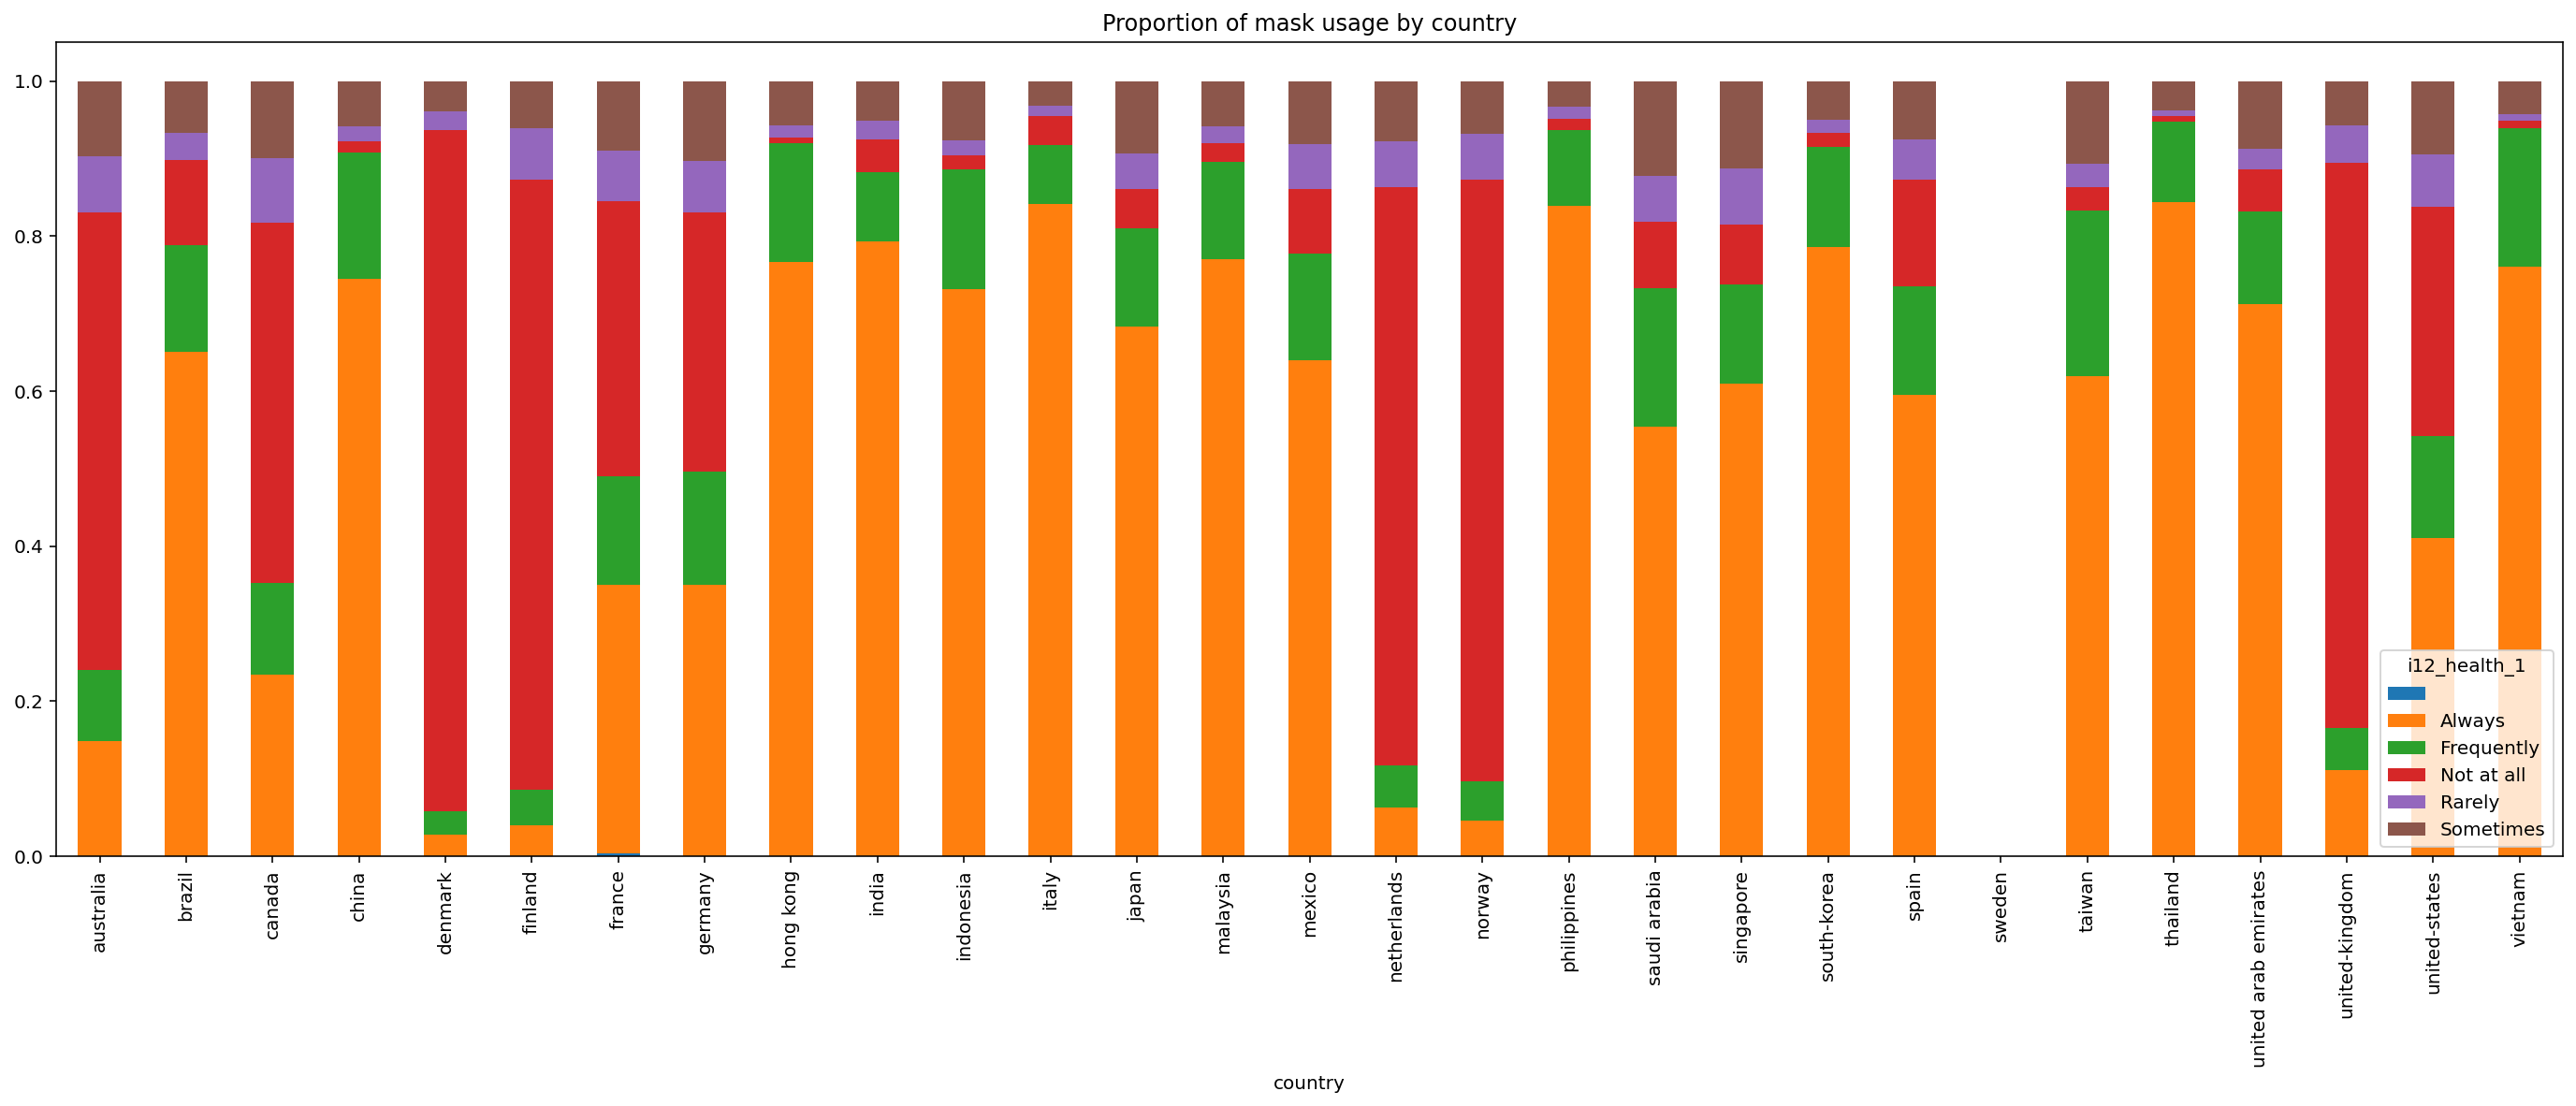

In [18]:
fig, ax = plt.subplots(figsize=(24, 8))
mask_question = 'i12_health_1'
counts = ygbt.data[['country', mask_question, 'RecordNo']].groupby(['country', mask_question]).count().unstack()
normalised_counts = counts.div(counts.sum(axis=1), axis=0)
normalised_counts['RecordNo'].plot(kind='bar', stacked=True, ax=ax)
plt.title('Proportion of mask usage by country');

### Our World in Data
Our World in Data collects data on the number of Covid-19 tests performed in multiple countries. They join this with case and death data from the European CDC. Conveniently they also provide cases and test counts normalised by population. See https://ourworldindata.org/coronavirus for more information.

In [0]:
from covid19_datasets import OWIDCovid19

In [22]:
owid = OWIDCovid19()

INFO:covid19_datasets.our_world_in_data:Loading dataset from https://covid.ourworldindata.org/data/owid-covid-data.csv
INFO:covid19_datasets.our_world_in_data:Loaded


Example plot of cases vs tests for selected countries

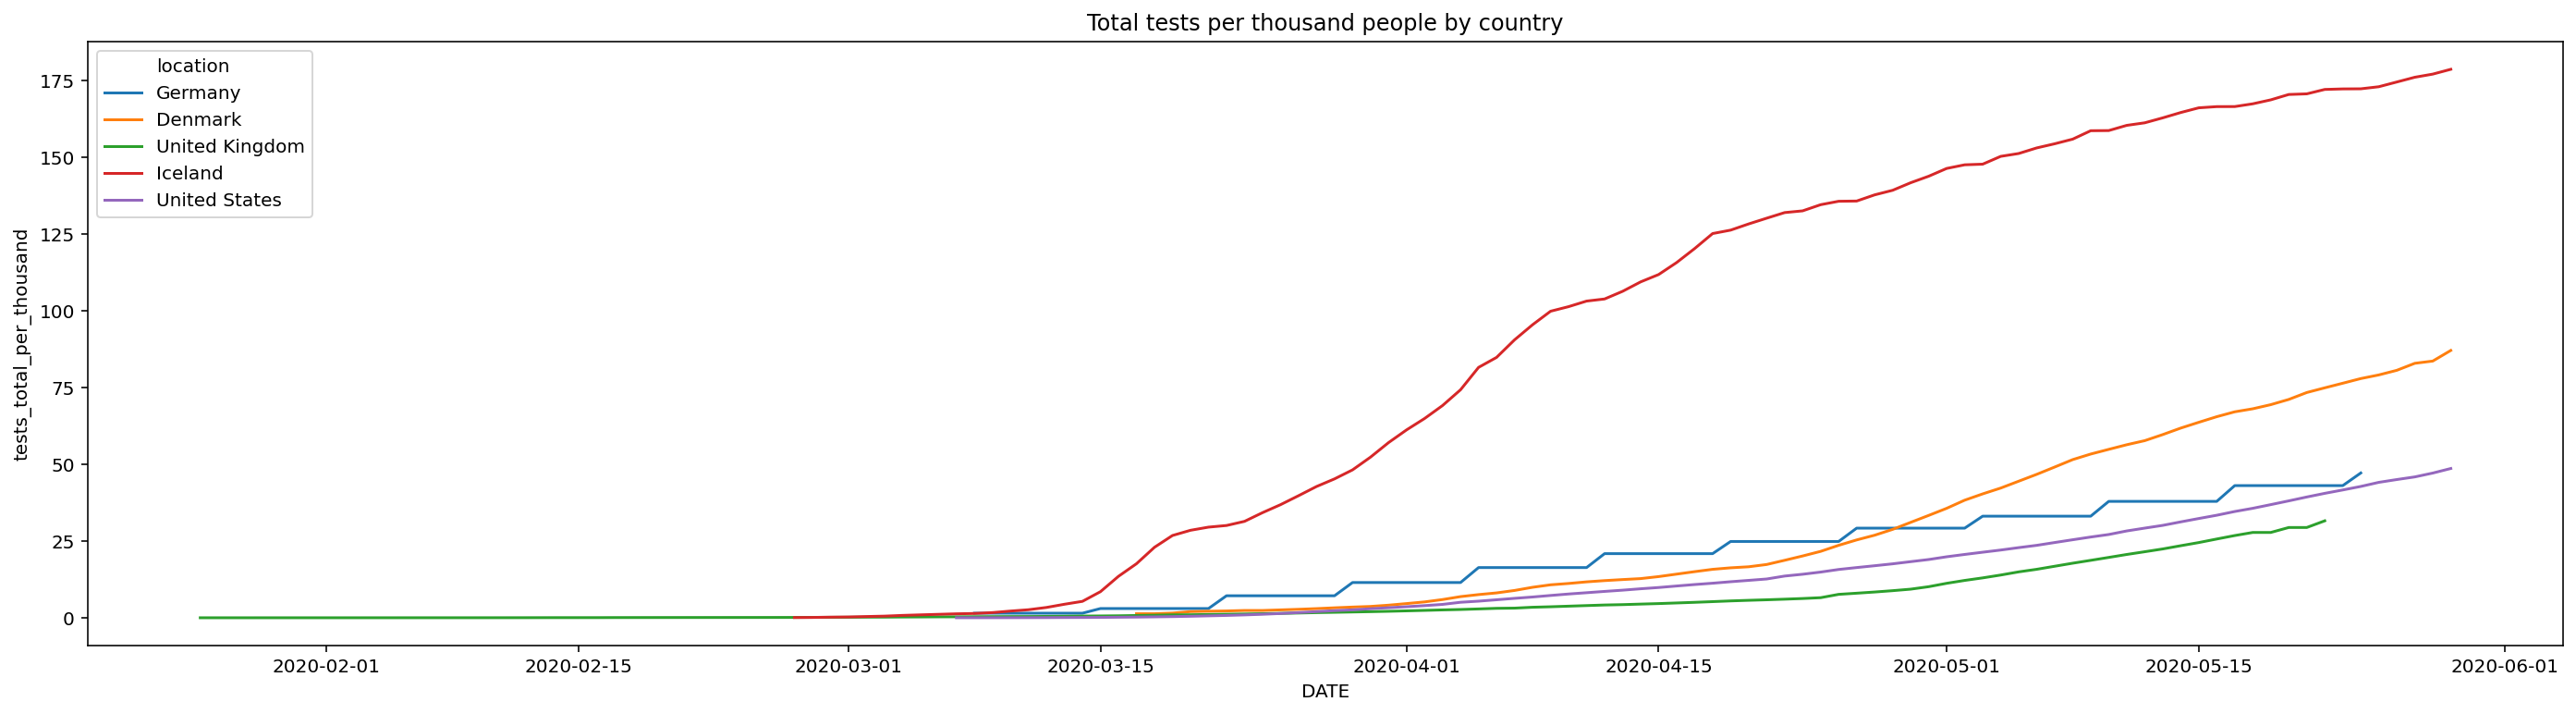

In [33]:
fig, ax = plt.subplots(figsize=(24, 6))
countries = ['United States', 'United Kingdom', 'Iceland', 'Germany', 'Denmark']
plot_data = owid.get_data()
plot_data = plot_data[plot_data.location.isin(countries)]
sns.lineplot(data=plot_data, x='DATE', y='tests_total_per_thousand', hue='location')
plt.title('Total tests per thousand people by country');

### UK cases data

NHS provides data on daily cases of COVID-19 registered in different areas of the UK. So far we support England, Wales and Scotland.

In [34]:
from covid19_datasets import UKCovid19Data
uk_data = UKCovid19Data()

INFO:covid19_datasets.uk_area_stats:Loading dataset from https://c19downloads.azureedge.net/downloads/csv/coronavirus-cases_latest.csv
INFO:covid19_datasets.uk_area_stats:Loaded
INFO:covid19_datasets.uk_area_stats:Loading dataset from http://www2.nphs.wales.nhs.uk:8080/CommunitySurveillanceDocs.nsf/61c1e930f9121fd080256f2a004937ed/77fdb9a33544aee88025855100300cab/$FILE/Rapid%20COVID-19%20surveillance%20data.xlsx
INFO:covid19_datasets.uk_area_stats:Loaded
INFO:covid19_datasets.uk_area_stats:Loading dataset from https://raw.githubusercontent.com/DataScienceScotland/COVID-19-Management-Information/master/COVID19%20-%20Daily%20Management%20Information%20-%20Scottish%20Health%20Boards%20-%20Cumulative%20cases.csv
INFO:covid19_datasets.uk_area_stats:Loaded


As an example we are going to plot a daily statistics from York

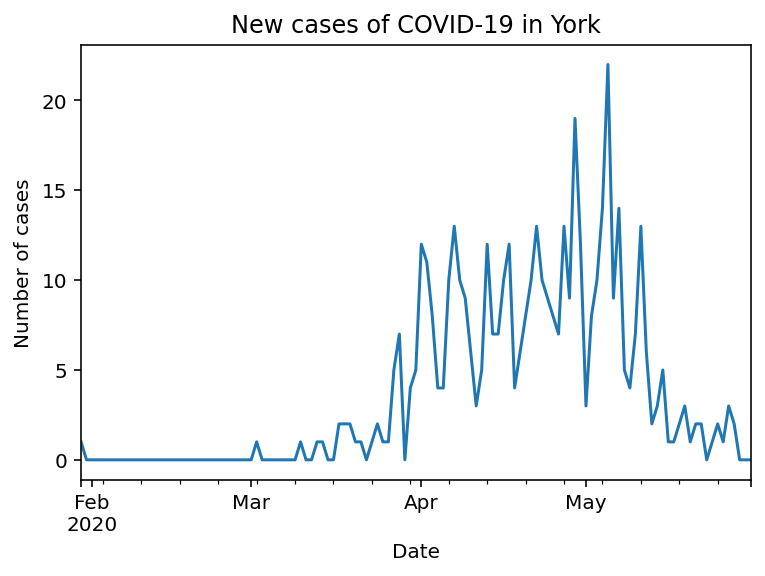

In [35]:
uk_cases = uk_data.get_cases_data()
uk_cases.loc[('England', 'York')].plot()
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.title('New cases of COVID-19 in York');

### Google Mobility Report Data
Google Mobility reports chart movement trends over time by geography, across different categories of places such as retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential. For details see documentation: https://www.google.com/covid19/mobility/data_documentation.html

In [36]:
from covid19_datasets import Mobility
mob = Mobility()

INFO:covid19_datasets.mobility:Loading data from https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO:covid19_datasets.mobility:Loaded


**Example**: Plot mobility data for the UK

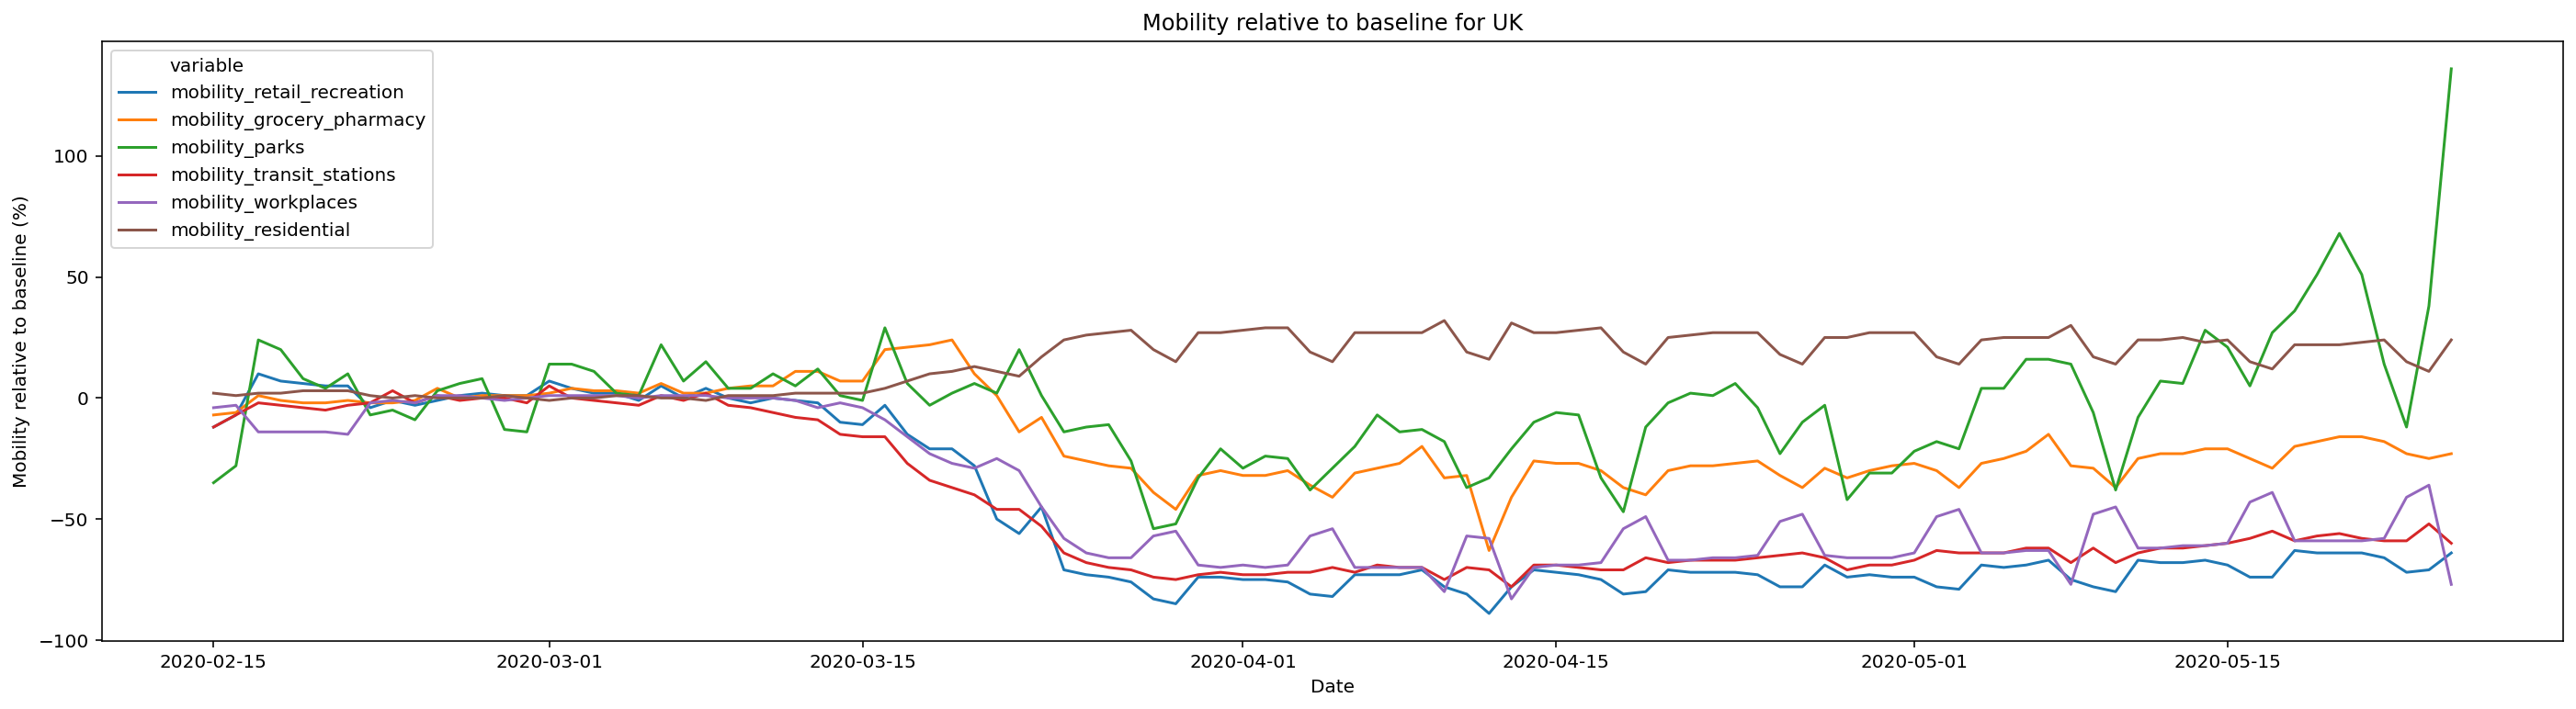

In [37]:
uk_data = mob.get_data().query('ISO == "GBR"')

fig, ax = plt.subplots(figsize=(24, 6))
sns.lineplot(data=uk_data.drop('ISO', axis='columns').melt(id_vars=['DATE']), x='DATE', y='value', hue='variable')

plt.title('Mobility relative to baseline for UK')
plt.xlabel('Date')
plt.ylabel('Mobility relative to baseline (%)')
plt.show()

### Apple Mobility Trends Data
Apple provides changes in routing requests through their Apple Maps product for various countries over time. 

In [38]:
from covid19_datasets import AppleMobility
apple_mob = AppleMobility()

INFO:covid19_datasets.apple:Loading Apple Mobility data from https://covid19-static.cdn-apple.com//covid19-mobility-data/2009HotfixDev14/v3/en-us/applemobilitytrends-2020-05-30.csv


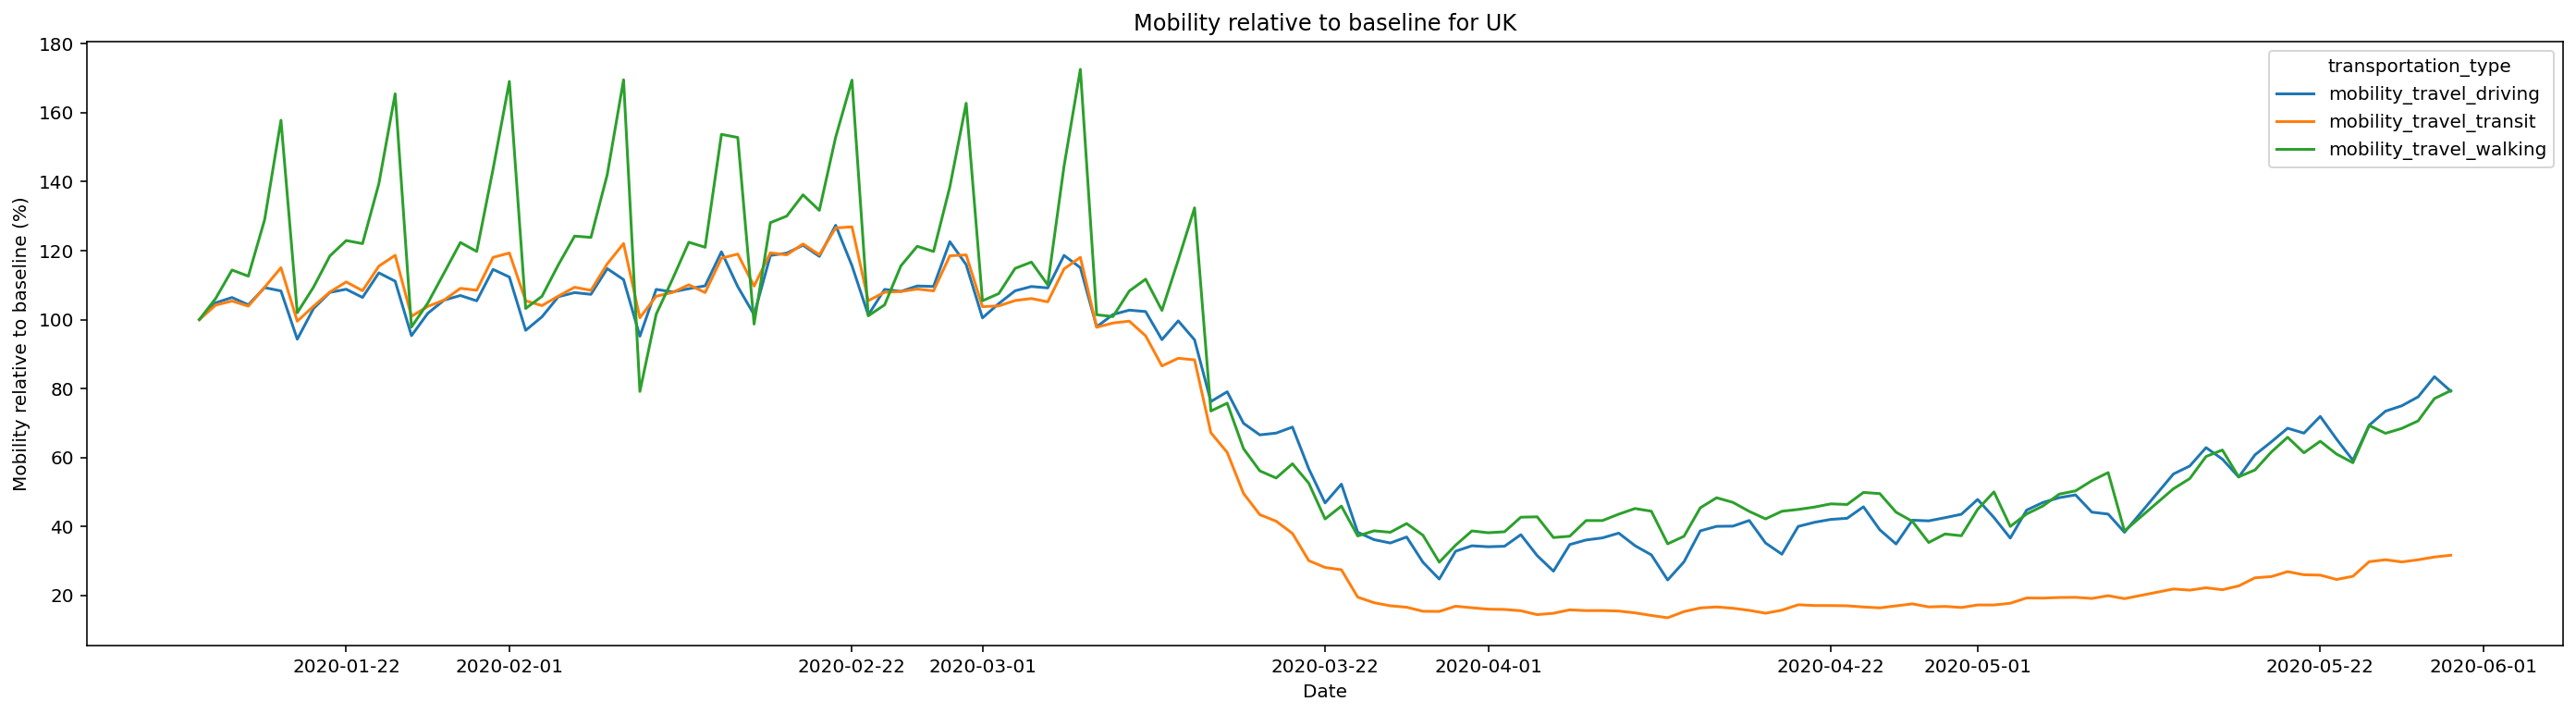

In [47]:
uk_data = apple_mob.get_country_data().query('ISO == "GBR"')

fig, ax = plt.subplots(figsize=(24, 6))
sns.lineplot(data=uk_data.drop('ISO', axis='columns').melt(id_vars=['DATE']), x='DATE', y='value', hue='transportation_type')

plt.title('Mobility relative to baseline for UK')
plt.xlabel('Date')
plt.ylabel('Mobility relative to baseline (%)')
plt.show()

The data is available at a finer resolution for some countries, for example, here we plot mobility for New York City

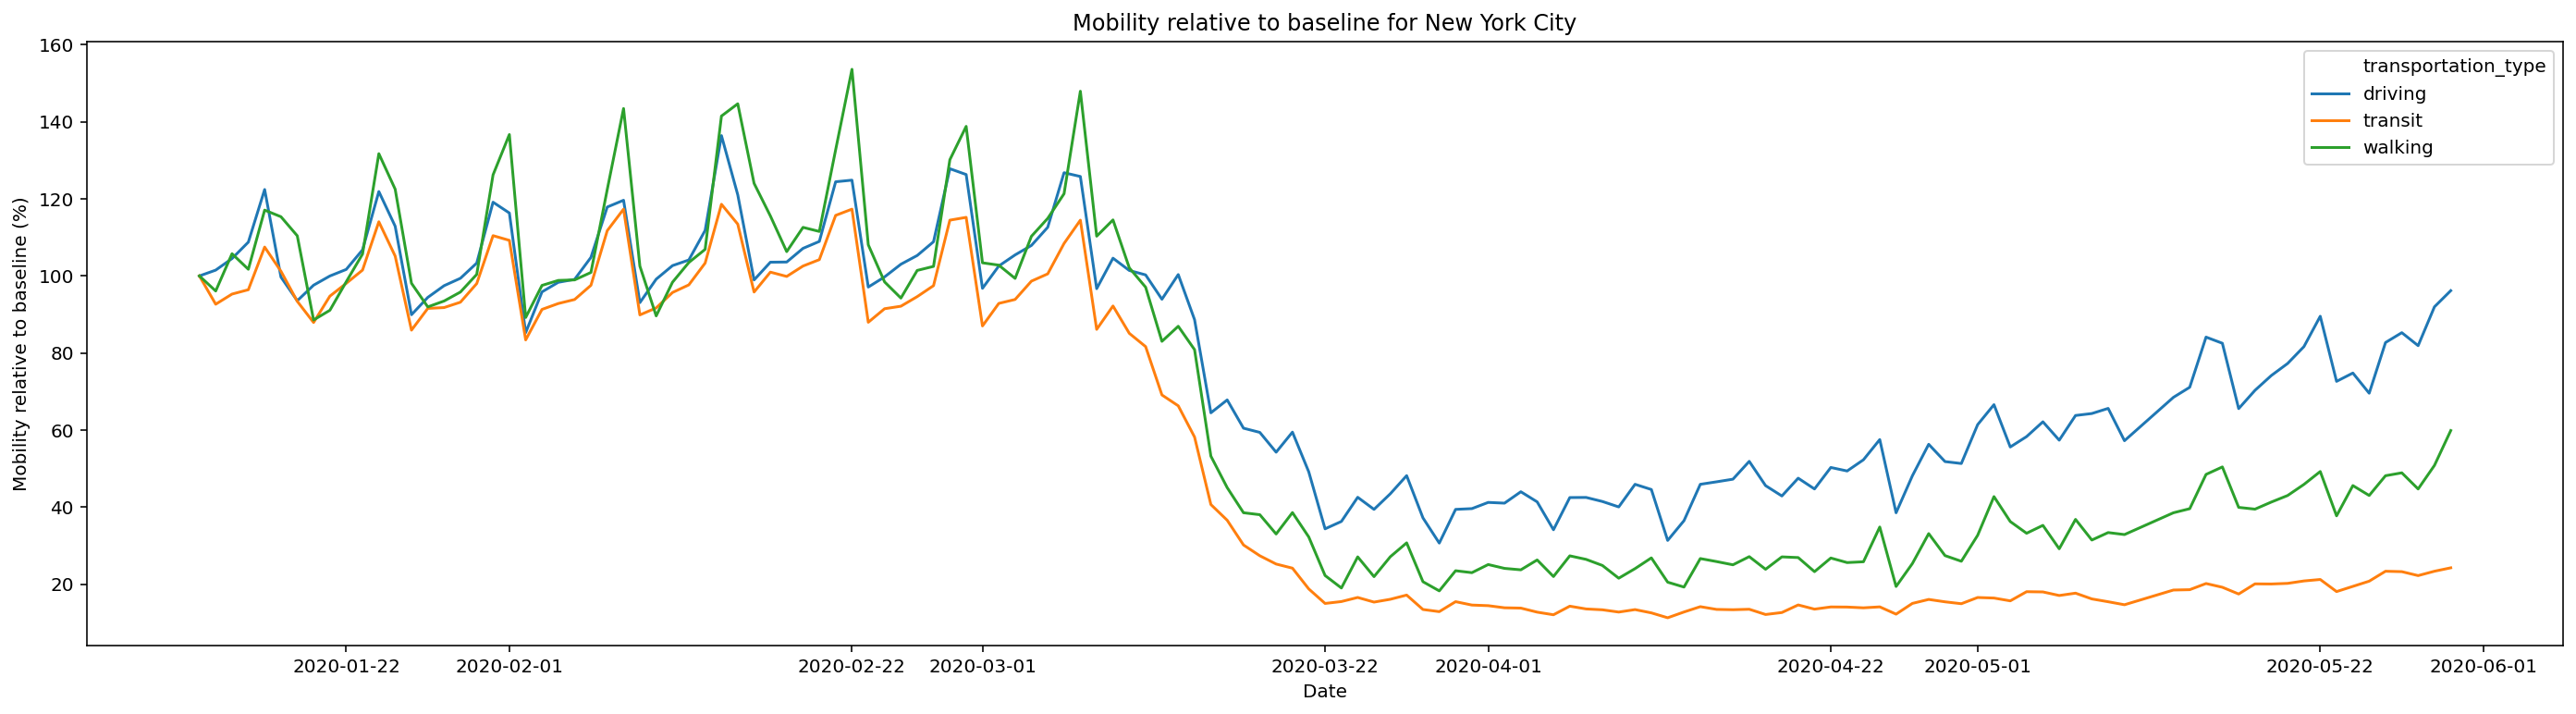

In [68]:
plot_df = (
    apple_mob.get_raw_data()
    .query('country == "United States" and region == "New York City"')
    .drop(['geo_type', 'region', 'alternative_name', 'sub-region', 'country'], axis='columns')
    .melt(id_vars=['transportation_type'], value_name='value', var_name='DATE'))
plot_df.DATE = pd.to_datetime(plot_df.DATE)

fig, ax = plt.subplots(figsize=(24, 6))
sns.lineplot(data=plot_df, x='DATE', y='value', hue='transportation_type')

plt.title('Mobility relative to baseline for New York City')
plt.xlabel('Date')
plt.ylabel('Mobility relative to baseline (%)')
plt.show()

### Johns Hopkins 
The Johns Hopkins University tracks reported COVID-19 cases and deaths at a finer granularity than the ECDC and WHO. They have province/state level data available for many countries and data down to the adminstration level in the US. We group US data to state-level to match other countries and the level at which policy interventions are most likely to be enforced.

In [0]:
from covid19_datasets import JohnsHopkins
jh = JohnsHopkins()

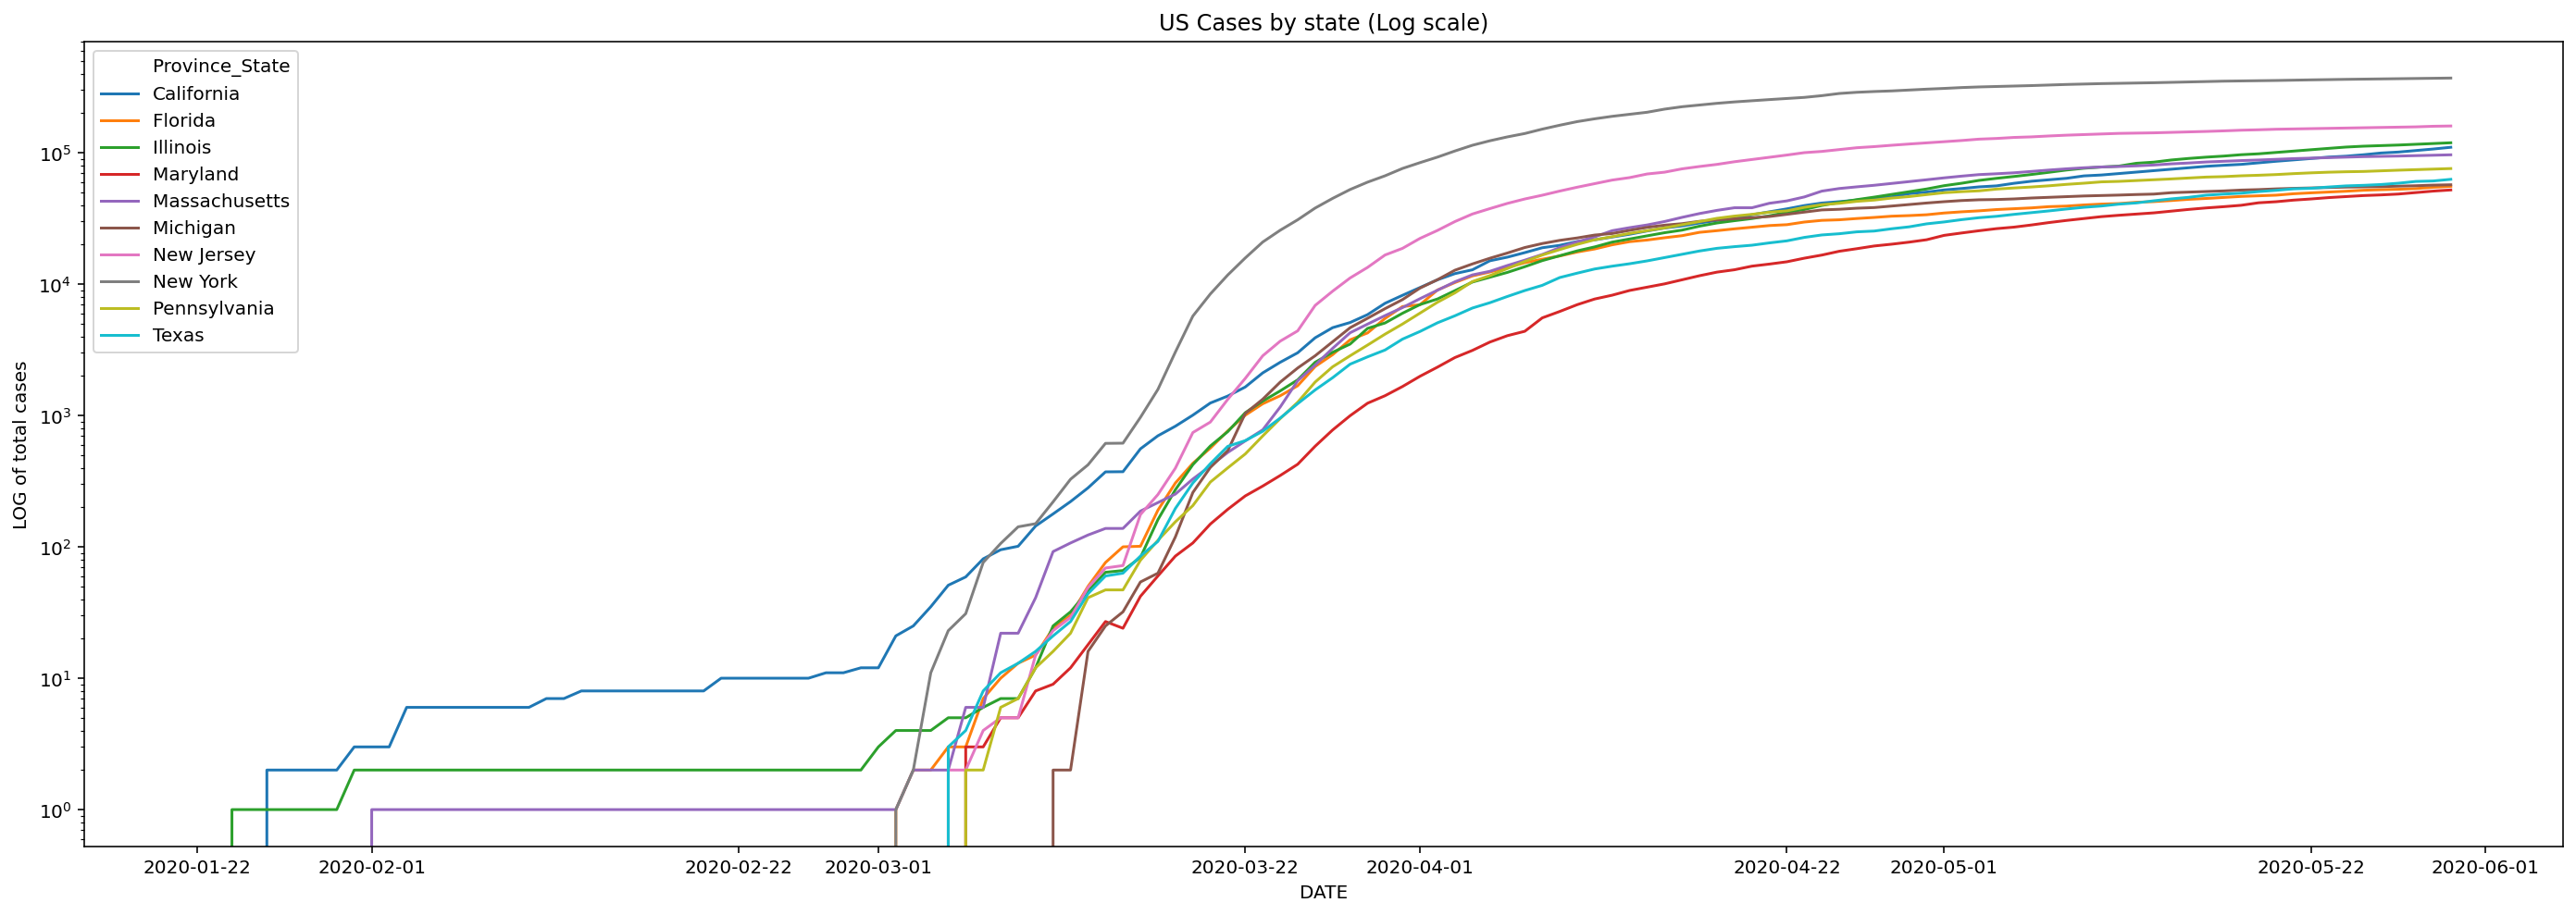

In [70]:
#@title Plot cases for the top 10 US states
us_data = jh.get_data().query('Country_Region == "US"')
states = us_data.groupby('Province_State').max().nlargest(10, "total_cases").index
us_data = us_data[us_data['Province_State'].isin(states)]

fig, ax = plt.subplots(figsize=(24, 8))
sns.lineplot(data=us_data, x='DATE', y='total_cases', hue='Province_State', ax=ax)
plt.yscale('log')
plt.title('US Cases by state (Log scale)')
plt.ylabel('LOG of total cases')
plt.show()

### Excess Deaths
Weekly mortality statistics are provided by the Human Mortality Database and EuroStats. We use these to calculate excess deaths (difference between weekly deaths in 2020 and the average over the same week in the previous 5 years) and augment it with some pre-calcualted figures from the Economist. 

In [71]:
from covid19_datasets import ExcessMortality
excess = ExcessMortality()

INFO:covid19_datasets.economist_excess_mortality:Loading The Economist excess mortality dataset
INFO:covid19_datasets.economist_excess_mortality:Loading austria from https://raw.githubusercontent.com/TheEconomist/covid-19-excess-deaths-tracker/master/output-data/excess-deaths/austria_excess_deaths.csv
INFO:covid19_datasets.economist_excess_mortality:Loading belgium from https://raw.githubusercontent.com/TheEconomist/covid-19-excess-deaths-tracker/master/output-data/excess-deaths/belgium_excess_deaths.csv
INFO:covid19_datasets.economist_excess_mortality:Loading britain from https://raw.githubusercontent.com/TheEconomist/covid-19-excess-deaths-tracker/master/output-data/excess-deaths/britain_excess_deaths.csv
INFO:covid19_datasets.economist_excess_mortality:Loading denmark from https://raw.githubusercontent.com/TheEconomist/covid-19-excess-deaths-tracker/master/output-data/excess-deaths/denmark_excess_deaths.csv
INFO:covid19_datasets.economist_excess_mortality:Loading ecuador from https:

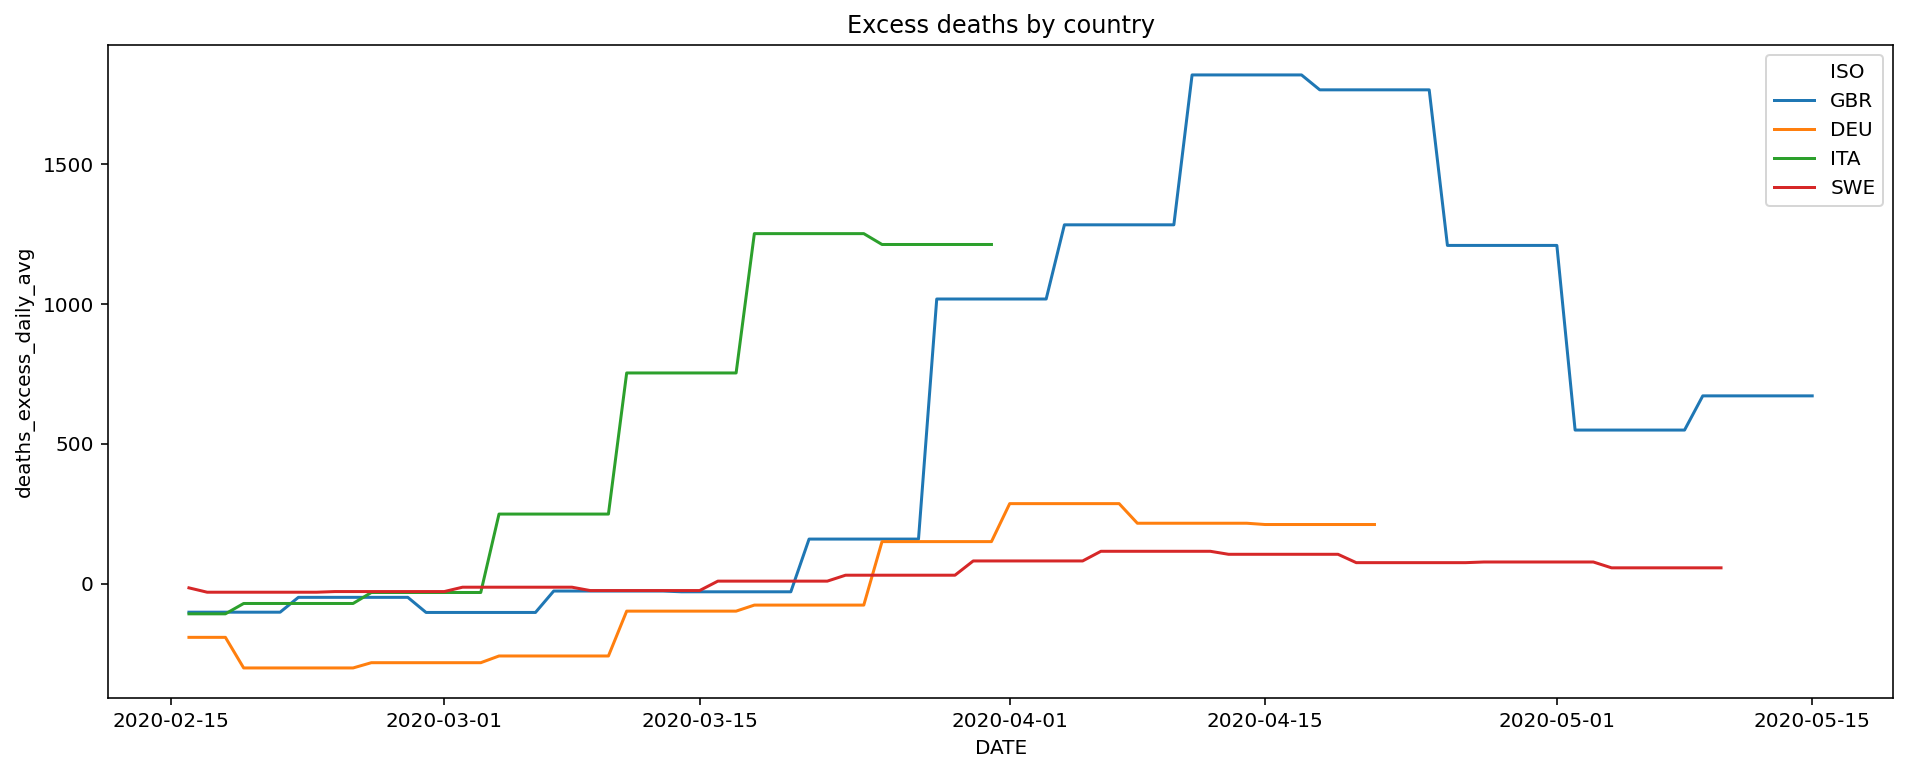

In [91]:
isos = ['GBR', 'DEU', 'ITA', 'SWE']
fig, ax = plt.subplots(figsize=(16, 6))
plot_df = excess.get_data()
plot_df = plot_df[plot_df.ISO.isin(isos)].query('DATE > "2020-02-15"')
plot_df.loc[:, 'deaths_excess_daily_avg'] = plot_df.deaths_excess_daily_avg.astype(float)
sns.lineplot(data=plot_df, x='DATE', y='deaths_excess_daily_avg', hue='ISO')
plt.title('Excess deaths by country');